In [1]:
import pandas as pd
import numpy as np
#每个学校更加提档线差单独计算预测2021年的提档线，并预测2021的分数线 相加得预测分数

# 一读取数据，数据拆分


In [23]:
data = pd.read_excel('school_enroll_unit_admission.xlsx')
data_5=data[['school_id','enroll_year','min_score_diff']]
data_diff =data_5.drop_duplicates(subset=['enroll_year','school_id'], keep='first', inplace=False).copy() #去掉重复值
data_diff.head(20)
#构建分差数据列 预测分差

,school_id,enroll_year,min_score_diff
0,52ac2e9a747aec013fcf5190,2020,119.0
1,52ac2e9a747aec013fcf5190,2019,118.0
2,52ac2e9a747aec013fcf5190,2018,89.0
3,52ac2e9a747aec013fcf5190,2017,113.0
8,52ac2e99747aec013fcf4e6f,2020,127.0
9,52ac2e99747aec013fcf4e6f,2019,126.0
10,52ac2e99747aec013fcf4e6f,2018,96.0
11,52ac2e99747aec013fcf4e6f,2017,115.0
16,52ac2e9b747aec013fcf5417,2020,112.0
17,52ac2e9b747aec013fcf5417,2019,110.0


In [24]:
data['score_tidang'] = data['min_score']-data['min_score_diff']
data_tidang =data[['enroll_year','school_id','score_tidang']].copy()
data_tidang =data_tidang.drop_duplicates(subset=['enroll_year','school_id'], keep='first', inplace=False)
data_tidang.head()

,enroll_year,school_id,score_tidang
0,2020,52ac2e9a747aec013fcf5190,527.0
1,2019,52ac2e9a747aec013fcf5190,540.0
2,2018,52ac2e9a747aec013fcf5190,553.0
3,2017,52ac2e9a747aec013fcf5190,537.0
8,2020,52ac2e99747aec013fcf4e6f,527.0


In [25]:
data_tidang.dropna(inplace=True)
data_diff.dropna(inplace=True)

In [26]:
data_diff.shape

(7102, 3)

# 二 根据学校构建线性回归模型

In [27]:
list2 =data_diff['school_id'].tolist()
list3=data_tidang['school_id'].tolist()


In [28]:
len(list2)

7102

In [29]:
set3 =set(list2)
set4 =set(list3)

In [30]:
list4=list(set3)
list5=list(set4)
#将所有学校特征存储在列表中

In [31]:
from sklearn.model_selection import train_test_split #数据拆分
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [32]:
dict={}
dict2={}
for  i  in list4:
    
    data3 =data_diff[data_diff['school_id']==i]
    
    x = data3['enroll_year'].values.reshape(-1, 1)
    y = data3['min_score_diff']
    linreg = LinearRegression()
    linreg.fit(x, y)
    dict[i]=linreg.predict([[2021]])
    dict2[i]=linreg.predict([[2020]])

In [33]:
dict

{'52ac2e98747aec013fcf4aa5': array([205.16666667]),
 '52ac2e99747aec013fcf4f56': array([32.]),
 '52ac2e98747aec013fcf4b4b': array([154.5]),
 '52ac2e99747aec013fcf4ee9': array([8.]),
 '52ac2e97747aec013fcf49db': array([328.]),
 '52ac2e98747aec013fcf4c02': array([136.5]),
 '52ac2e98747aec013fcf4b40': array([25.]),
 '52ac2e9a747aec013fcf5076': array([176.]),
 '52ac2e99747aec013fcf4d62': array([44.]),
 '52ac2e9a747aec013fcf5028': array([323.5]),
 '52ac2e99747aec013fcf4d5a': array([21.83333333]),
 '52ac2e99747aec013fcf4e21': array([60.5]),
 '52ac2e9b747aec013fcf533d': array([45.]),
 '52ac2e98747aec013fcf4b72': array([38.5]),
 '52ac2e99747aec013fcf4e2e': array([37.]),
 '52ac2e99747aec013fcf4d6b': array([48.33333333]),
 '52ac2e9b747aec013fcf53b2': array([331.]),
 '52ac2e99747aec013fcf4f63': array([328.5]),
 '52ac2e99747aec013fcf4ea0': array([85.]),
 '52ac2e9a747aec013fcf51ff': array([-71.16666667]),
 '52ac2e99747aec013fcf4d78': array([51.]),
 '52ac2e97747aec013fcf49f4': array([276.5]),
 '52ac

In [34]:
dict3={}
dict4={}
for  i  in list5:
    
    data3 =data_tidang[data_tidang['school_id']==i]
    
    x = data3['enroll_year'].values.reshape(-1, 1)
    y = data3['score_tidang']
    linreg = LinearRegression()
    linreg.fit(x, y)
    dict3[i]=linreg.predict([[2021]])
    dict4[i]=linreg.predict([[2020]])

In [35]:
diff_2021 = pd.DataFrame(dict)
diff_2020 = pd.DataFrame(dict2)
tidang_2021 = pd.DataFrame(dict3)
tidang_2020 = pd.DataFrame(dict4)

(3, 4)

In [36]:
diff_2021=pd.DataFrame(diff_2021.stack()).reset_index()
diff_2020=pd.DataFrame(diff_2020.stack()).reset_index()
tidang_2021=pd.DataFrame(tidang_2021.stack()).reset_index()
tidang_2020=pd.DataFrame(tidang_2020.stack()).reset_index()

In [37]:
data1 =diff_2021.rename(columns={'level_1':'school_id',0:'min_score_diff','level_0':'enroll_year'})
data1['enroll_year']=2021
data2 =diff_2020.rename(columns={'level_1':'school_id',0:'min_score_diff','level_0':'enroll_year'})
data2['enroll_year']=2020
data3 =tidang_2021.rename(columns={'level_1':'school_id',0:'score_tidang','level_0':'enroll_year'})
data3['enroll_year']=2021
data4 =tidang_2020.rename(columns={'level_1':'school_id',0:'score_tidang','level_0':'enroll_year'})
data4['enroll_year']=2020

In [38]:
data1.shape

(2068, 3)

In [39]:
data_2021=pd.merge(data1,data3,how='inner',left_on=['enroll_year','school_id'],right_on=['enroll_year','school_id'])

In [40]:
data_2020=pd.merge(data2,data4,how='inner',left_on=['enroll_year','school_id'],right_on=['enroll_year','school_id'])

In [47]:
data_2021['min_score'] = data_2021['min_score_diff'] +data_2021['score_tidang']
data_2021.head()

,enroll_year,school_id,min_score_diff,score_tidang,min_score
0,2021,52ac2e98747aec013fcf4aa5,205.166667,116.666667,321.833333
1,2021,52ac2e99747aec013fcf4f56,32.000000,150.000000,182.000000
2,2021,52ac2e98747aec013fcf4b4b,154.500000,116.666667,271.166667
3,2021,52ac2e99747aec013fcf4ee9,8.000000,528.000000,536.000000
4,2021,52ac2e97747aec013fcf49db,328.000000,130.000000,458.000000


In [49]:
data_2020=data_2020.rename(columns={'min_score_diff':'min_score_diff_1','score_tidang':'score_tidang_1'})
data_2020['min_score_1'] = data_2020['min_score_diff_1'] +data_2020['score_tidang_1']

In [50]:
data_2020.head()

,enroll_year,school_id,min_score_diff_1,score_tidang_1,min_score_1
0,2020,52ac2e98747aec013fcf4aa5,174.666667,136.666667,311.333333
1,2020,52ac2e99747aec013fcf4f56,32.000000,150.000000,182.000000
2,2020,52ac2e98747aec013fcf4b4b,140.000000,136.666667,276.666667
3,2020,52ac2e99747aec013fcf4ee9,25.900000,512.900000,538.800000
4,2020,52ac2e97747aec013fcf49db,316.300000,146.000000,462.300000


In [59]:
data2020=data[['school_id','enroll_year','min_score']]
data2020 =data2020.drop_duplicates(subset=['enroll_year','school_id'], keep='first', inplace=False).copy()

In [60]:
data2020 = data2020[data2020['enroll_year']==2020] #真实2020得情况
data2020.head()

,school_id,enroll_year,min_score
0,52ac2e9a747aec013fcf5190,2020,646
8,52ac2e99747aec013fcf4e6f,2020,654
16,52ac2e9b747aec013fcf5417,2020,639
24,52ac2e9a747aec013fcf5268,2020,628
32,52ac2e9a747aec013fcf5081,2020,627


In [61]:
data2020yuce =data_2020[['school_id','enroll_year','min_score_1']]

In [62]:
data2020yuce.head()

,school_id,enroll_year,min_score_1
0,52ac2e98747aec013fcf4aa5,2020,311.333333
1,52ac2e99747aec013fcf4f56,2020,182.000000
2,52ac2e98747aec013fcf4b4b,2020,276.666667
3,52ac2e99747aec013fcf4ee9,2020,538.800000
4,52ac2e97747aec013fcf49db,2020,462.300000


In [69]:
datazhanshi=pd.merge(data2020yuce,data2020,how='inner',left_on=['enroll_year','school_id'],right_on=['enroll_year','school_id'])
datazhanshi  #左边是预测值  右边是真实值

,school_id,enroll_year,min_score_1,min_score
0,52ac2e98747aec013fcf4aa5,2020,311.333333,150
1,52ac2e99747aec013fcf4f56,2020,182.000000,150
2,52ac2e98747aec013fcf4b4b,2020,276.666667,150
3,52ac2e99747aec013fcf4ee9,2020,538.800000,534
4,52ac2e97747aec013fcf49db,2020,462.300000,457
5,52ac2e98747aec013fcf4c02,2020,260.000000,287
6,52ac2e98747aec013fcf4b40,2020,555.700000,551
7,52ac2e9a747aec013fcf5076,2020,326.000000,150
8,52ac2e99747aec013fcf4d62,2020,573.500000,568
9,52ac2e9a747aec013fcf5028,2020,457.200000,451


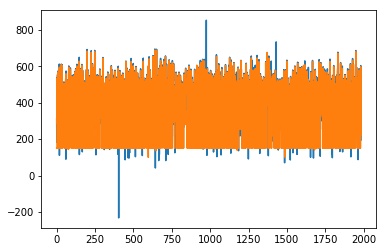

In [68]:
plt.plot(datazhanshi['min_score_1'])
plt.plot(datazhanshi['min_score'])

#大部分按此模型得画都在重合区域 

In [70]:
datazhanshi['差值'] =datazhanshi['min_score_1']-datazhanshi['min_score']

In [72]:
datazhanshi.head()

,school_id,enroll_year,min_score_1,min_score,差值
0,52ac2e98747aec013fcf4aa5,2020,311.333333,150,161.333333
1,52ac2e99747aec013fcf4f56,2020,182.000000,150,32.000000
2,52ac2e98747aec013fcf4b4b,2020,276.666667,150,126.666667
3,52ac2e99747aec013fcf4ee9,2020,538.800000,534,4.800000
4,52ac2e97747aec013fcf49db,2020,462.300000,457,5.300000


In [74]:
datazhanshi.sort_values(by="差值" , ascending=False)   #这个地方主要受到了分数线得预测 还有误差值 所以下面需要做分布预测

,school_id,enroll_year,min_score_1,min_score,差值
975,52ac2e98747aec013fcf4adb,2020,853.000000,150,703.000000
1430,52ac2e9a747aec013fcf51e4,2020,734.000000,150,584.000000
1539,52ac2e98747aec013fcf4c45,2020,576.000000,150,426.000000
1580,52ac2e98747aec013fcf4a6a,2020,563.000000,150,413.000000
943,52ac2e9a747aec013fcf4fe8,2020,559.000000,150,409.000000
142,52ac2e98747aec013fcf4ba1,2020,538.333333,150,388.333333
135,5b2a37deb97bd20dddc36ae5,2020,518.000000,150,368.000000
1176,52ac2e9b747aec013fcf53e2,2020,503.000000,139,364.000000
791,52ac2e9b747aec013fcf539c,2020,512.666667,150,362.666667
1113,570b4d7ad6d9f53ec09604d9,2020,510.000000,150,360.000000


In [113]:
datazhanshi =datazhanshi[-5< datazhanshi['差值'] ]    #规定误差值范围
datazhanshi =datazhanshi[ datazhanshi['差值'] <5 ]
datazhanshi.shape

(353, 5)

In [116]:
datazhanshi2 =datazhanshi[-30< datazhanshi['差值'] ]    #规定误差值范围
datazhanshi2 =datazhanshi[ datazhanshi['差值'] <30 ]


In [115]:
# datazhanshi.shape  有353符合  去除符合得id其他的用另外得方式计算

  取出符合得id找到对应2021得值这部分相对准确，datazhanshi

IndentationError: unexpected indent (<ipython-input-115-82d6b416f469>, line 3)

#  主要矛盾点在于 专科 和2批次  导致得不准确 下面进行分批

In [84]:
import pandas as pd
import numpy as np
data = pd.read_excel('school_enroll_unit_admission.xlsx')
data.head(5) #读取数据
data['batch_name'].value_counts()

高职专科批    8213
本科第二批    6319
本科第一批    2765
Name: batch_name, dtype: int64

In [85]:
data['score_tidang'] = data['min_score']-data['min_score_diff']
data_gaozhi = data[data['batch_name']=='高职专科批']
data_erpi = data[data['batch_name']=='本科第二批']
data_yipi = data[data['batch_name']=='本科第一批']
data_gaozhi2 =data_gaozhi[['school_id','enroll_year','min_score_diff','score_tidang','min_score']]
data_erpi = data_erpi[['school_id','enroll_year','min_score_diff','score_tidang','min_score']]
data_yipi = data_yipi[['school_id','enroll_year','min_score_diff','score_tidang','min_score']]
data_gaozhi2.head()

,school_id,enroll_year,min_score_diff,score_tidang,min_score
450,52ac2e98747aec013fcf4aec,2019,325.0,150.0,475
455,52ac2e98747aec013fcf4aec,2019,328.0,150.0,478
966,52ac2e9a747aec013fcf50b0,2018,299.0,190.0,489
968,52ac2e9a747aec013fcf50b0,2017,256.0,190.0,446
973,52ac2e9a747aec013fcf50b0,2018,274.0,180.0,454


In [86]:
data_gaozhi2=data_gaozhi2.drop_duplicates(subset=['enroll_year','school_id'], keep='first', inplace=False)
data_erpi=data_gaozhi2.drop_duplicates(subset=['enroll_year','school_id'], keep='first', inplace=False)
data_yipi=data_gaozhi2.drop_duplicates(subset=['enroll_year','school_id'], keep='first', inplace=False)
#去掉重复值

In [87]:
data_gaozhi2=data_gaozhi2[data_gaozhi2['min_score_diff'] > 1]
import sklearn.preprocessing as preproc
#标准化
data_gaozhi2['enroll_year'] = preproc.StandardScaler().fit_transform(data_gaozhi2[['enroll_year']])
data_gaozhi2['min_score_diff'] = preproc.StandardScaler().fit_transform(data_gaozhi2[['min_score_diff']])
#data_gaozhi2['score_tidang'] = preproc.StandardScaler().fit_transform(data_gaozhi2[['score_tidang']])
from sklearn.model_selection import train_test_split
y=data_gaozhi2.iloc[:,4:]
y.shape
X=data_gaozhi2.iloc[:,1:3]
X.shape
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=100)
linreg2 = LinearRegression() #调用最小2乘法的模型
linreg2.fit(X_train,  y_train)
print(linreg2.coef_)
print(linreg2.intercept_)
#模型训练过程
print(linreg2.score(X_test,y_test))

[[-17.46050003  91.89566426]]
[325.47435922]
0.9888094698652284


C:\Users\NICAI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\NICAI\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


这个模型有点过拟合了 在测试集准确率98.8%  后面改进2种优化模型 正则和岭回归。

In [91]:
predict=data_2021.iloc[:,0:3:2]
predict= preproc.StandardScaler().fit_transform(predict)
data_2021['min_score_all'] =linreg2.predict(predict)
data_2021.head()  #2种不同方式预测 用2020去观察准确率

C:\Users\NICAI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\NICAI\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,enroll_year,school_id,min_score_diff,score_tidang,min_score,min_score_all
0,2021,52ac2e98747aec013fcf4aa5,205.166667,116.666667,321.833333,403.141472
1,2021,52ac2e99747aec013fcf4f56,32.000000,150.000000,182.000000,268.032108
2,2021,52ac2e98747aec013fcf4b4b,154.500000,116.666667,271.166667,363.609955
3,2021,52ac2e99747aec013fcf4ee9,8.000000,528.000000,536.000000,249.306652
4,2021,52ac2e97747aec013fcf49db,328.000000,130.000000,458.000000,498.979395


In [104]:
data = pd.read_excel('school_enroll_unit_admission.xlsx')
data_5=data[['school_id','enroll_year','min_score_diff','min_score']]
data_diff2 =data_5.drop_duplicates(subset=['enroll_year','school_id'], keep='first', inplace=False).copy()
data_2020zhuanque=data_diff2[data_diff2['enroll_year']==2020].copy()
data_2020zhuanque.dropna(inplace=True)


In [105]:
data_2020zhuanque.head()

,school_id,enroll_year,min_score_diff,min_score
0,52ac2e9a747aec013fcf5190,2020,119.0,646
8,52ac2e99747aec013fcf4e6f,2020,127.0,654
16,52ac2e9b747aec013fcf5417,2020,112.0,639
24,52ac2e9a747aec013fcf5268,2020,101.0,628
32,52ac2e9a747aec013fcf5081,2020,100.0,627


In [106]:
predict=data_2020zhuanque.iloc[:,1:3]
predict= preproc.StandardScaler().fit_transform(predict)
data_2020zhuanque['min_score_all'] =linreg2.predict(predict)
data_2020zhuanque.head()

C:\Users\NICAI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\NICAI\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,school_id,enroll_year,min_score_diff,min_score,min_score_all
0,52ac2e9a747aec013fcf5190,2020,119.0,646,358.064765
8,52ac2e99747aec013fcf4e6f,2020,127.0,654,366.563504
16,52ac2e9b747aec013fcf5417,2020,112.0,639,350.628368
24,52ac2e9a747aec013fcf5268,2020,101.0,628,338.942603
32,52ac2e9a747aec013fcf5081,2020,100.0,627,337.880260


In [109]:
data_2020zhuanque.sort_values(by="min_score" , ascending=False)



,school_id,enroll_year,min_score_diff,min_score,min_score_all
17233,56f3bb997187f06e544c8aad,2020,160.0,689,401.620801
10885,52ac2e99747aec013fcf4db3,2020,160.0,689,401.620801
8075,52ac2e9a747aec013fcf513d,2020,154.0,683,395.246747
8512,52aec45b747aec16a625212f,2020,152.0,681,393.122062
59,52ac2e9a747aec013fcf5307,2020,152.0,681,393.122062
15289,570b4d7ad6d9f53ec09604d7,2020,148.0,677,388.872693
195,52ac2e98747aec013fcf4ab7,2020,147.0,676,387.810350
11958,5abde6112c237a7b40846efd,2020,143.0,672,383.560981
8,52ac2e99747aec013fcf4e6f,2020,127.0,654,366.563504
1049,52ac2e97747aec013fcf4a08,2020,125.0,654,364.438819


In [117]:
### 专科数据这边考虑用插值法计算
